Arisha Rashid Khan

Task 1

Data Science and Business Analytics Intern

In [13]:
#Importing usual packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
%matplotlib inline


In [2]:
scores=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#checking to see if there's any null variables
scores.isnull().sum()


Hours     0
Scores    0
dtype: int64

In [6]:
scores["Scores"]=scores["Scores"].astype(float)
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


We create a histogram to check for any outliers in our data.

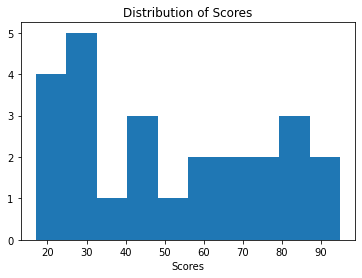

In [7]:
plt.hist(scores["Scores"])
plt.xlabel("Scores")
plt.title("Distribution of Scores" )
plt.show()

This shows that the distribution is even and there is no outlier in this data set.

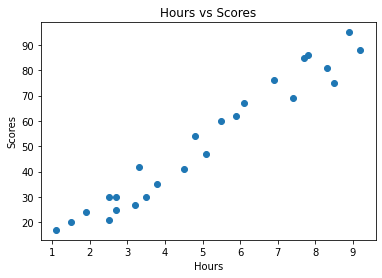

In [8]:
plt.scatter(scores["Hours"],scores["Scores"])
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

This scatter plot suggests that there's a moderate positive correlation between scores and hours. 

In [9]:
# Now seperate the dataset into the target variable y and feature variabes X
X=scores.iloc[:,:-1].values
X[:5]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5]])

In [10]:
y=scores.iloc[:,1].values
y[:5]

array([21., 47., 27., 75., 30.])

In [14]:
# Train and Test splitting 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Creating a Baseline

In [15]:
y_mean =y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
y_pred_baseline[:5]

[53.95, 53.95, 53.95, 53.95, 53.95]

In [16]:
mae_baseline = mean_absolute_error(y_pred_baseline,y_train)
print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 53.95
Baseline MAE: 22.75


This tells us that our model needs to have mean absolute error below 22.75
 in order to be useful.

Building Model


In [17]:
model =LinearRegression()


In [18]:
model.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred=model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [20]:
mae_training =mean_absolute_error(y_pred,y_test)
print("Training MAE:", round(mae_training, 2))

Training MAE: 4.18


Our mean Absoulute Error is way below 22.75, so this means our model is good to go.

Now, lets compare both the predicted and test data using a scatter plot


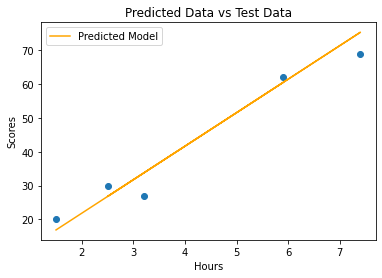

In [41]:
plt.plot(
    X_test,
    y_pred,
    color="orange",
    label="Predicted Model",
);
plt.scatter(X_test, y_test)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Predicted Data vs Test Data")
plt.legend();

Looking at this visualization, it seems like our model follows the actual test data values.

In [30]:
test_hours=[9.25]
pred_score=model.predict([test_hours])

In [38]:
print("The expexted score of a student if he/she studies 9.25 hours per day is ",pred_score[0])

The expexted score of a student if he/she studies 9.25 hours per day is  93.69173248737539
